# Análisis de los 25 retailers más grandes de Estados Unidos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importar datos aquí
dataset = pd.read_csv("./database/largest_us_retailers.csv", delimiter=",")
dataset


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [13]:
dataset.sort_values(by=['Sales'], ascending=False)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [18]:
average_of_sales = dataset.iloc[1:-1][['Company', 'Sales']].sort_values(by=['Sales'], ascending=False)
average_of_sales.columns

Index(['Company', 'Sales'], dtype='object')

In [35]:
average_of_sales['Sales'].mean()

47907.217391304344

In [102]:
len(average_of_sales)

23

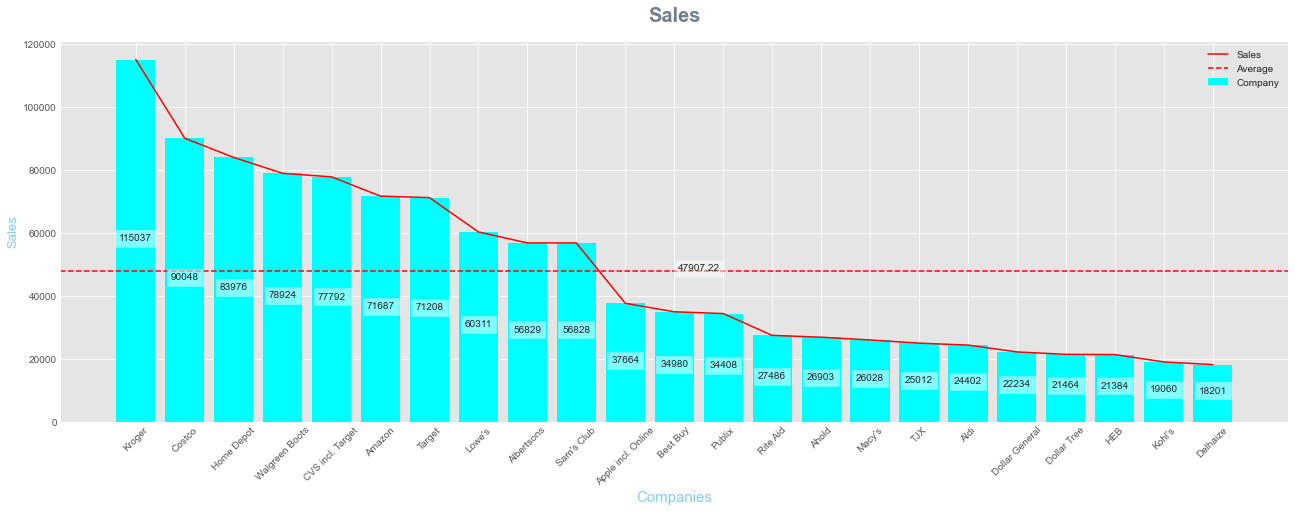

In [115]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], horizontalalignment="center",
                 bbox = dict(facecolor = 'white', alpha = .5))

plt.style.use('ggplot')
company_names = average_of_sales['Company'].values
sales = average_of_sales['Sales'].values

fig, axis = plt.subplots()
fig.set_size_inches(22, 7)
axis.bar(company_names, sales, color="cyan")
axis.plot(company_names, sales, color="red")
plt.axhline(sales.mean(), color="r", linestyle="--")
plt.xticks(rotation=45)
plt.legend(['Sales', 'Average','Company'])
plt.style.use('ggplot')
# axis.text(1, 13, 'Practice on GFG', style='italic', bbox={
#         'facecolor': 'green', 'alpha': 0.5, 'pad': 10})
axis.text(len(company_names)/2, sales.mean(), round(47907.217391304344,2), horizontalalignment="center",bbox = dict(facecolor = 'white', alpha = .5))
plt.xlabel('Companies', fontsize=15, color="skyblue")
plt.ylabel('Sales', fontsize=13, color="skyblue")
plt.title('Sales', fontsize=20, color="slategrey", fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
addlabels(company_names, sales)

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

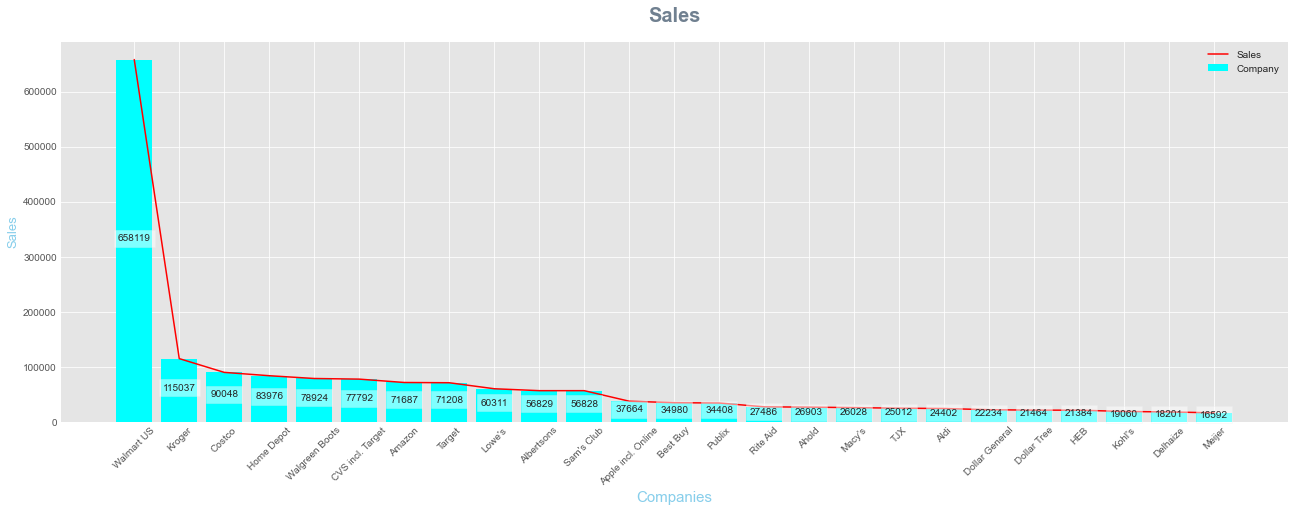

In [76]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], horizontalalignment="center",
                 bbox = dict(facecolor = 'white', alpha = .5))

plt.style.use('ggplot')
company_names = dataset['Company'].values
sales = dataset['Sales'].values

fig, axis = plt.subplots()
fig.set_size_inches(22, 7)
axis.bar(dataset.Company, dataset.Sales, color="cyan")
axis.plot(dataset.Company, dataset.Sales, color="red")
plt.xticks(rotation=45)
plt.legend(['Sales','Company'])
plt.style.use('ggplot')
plt.xlabel('Companies', fontsize=15, color="skyblue")
plt.ylabel('Sales', fontsize=13, color="skyblue")
plt.title('Sales', fontsize=20, color="slategrey", fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
addlabels(company_names, sales)

plt.show()


### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

### 5. ¿Cuál es el rango que existe entre las ventas?

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

## III. Tus propias preguntas

### 10. Pregunta

### 11. Pregunta

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edc68bfa-8df4-47a4-8622-860ebb931fe9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>